This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [50]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [52]:
print(type(x))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [53]:
x2 = tf.zeros(shape=(2, 2))
print(x2)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


**Random tensors**

In [60]:
tf.random.set_seed(10);
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.8757808 ]
 [ 0.3356369 ]
 [-0.35219625]], shape=(3, 1), dtype=float32)


In [56]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7017075 ]
 [0.04336786]
 [0.5604572 ]], shape=(3, 1), dtype=float32)


In [74]:
samples = tf.random.poisson([10], [0.5, 1.5])
print(samples)

tf.Tensor(
[[0. 2.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [2. 1.]
 [0. 3.]
 [1. 0.]
 [0. 0.]], shape=(10, 2), dtype=float32)


**NumPy arrays are assignable**

In [80]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [82]:
s = shape = (3,4)
y = np.full(s,10)
print(y)

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


**Creating a TensorFlow variable**

In [102]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.2661458],
       [ 0.9731772],
       [ 0.8618056]], dtype=float32)>


In [101]:
s = shape = (1,10)
V = tf.Variable(initial_value=tf.random.poisson(s,[0.5,1.5]))
print(V)

<tf.Variable 'Variable:0' shape=(1, 10, 2) dtype=float32, numpy=
array([[[2., 5.],
        [0., 3.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [1., 2.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [103]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [133]:
V.assign(tf.ones((1, 10,2)))

<tf.Variable 'UnreadVariable' shape=(1, 10, 2) dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [105]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [144]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

In [145]:
V.assign_add(tf.ones((1, 10,2)))

<tf.Variable 'UnreadVariable' shape=(1, 10, 2) dtype=float32, numpy=
array([[[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [148]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [151]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(result)
print(gradient)

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [153]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(tape)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [157]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)
print(speed)

tf.Tensor(9.8, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [160]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
print(positive_samples)
print(negative_samples)

[[ 2.10822071 -2.09759257]
 [ 3.58747     0.18076558]
 [ 3.3689919   2.32572725]
 ...
 [ 3.37553681 -0.59296385]
 [ 2.03173459  2.11559263]
 [ 4.34750193 -0.36708666]]
[[ 0.45443042  2.2894118 ]
 [ 0.37556872  3.04865321]
 [-0.49171604  3.2120059 ]
 ...
 [ 0.74332317  2.81446351]
 [-1.25024202  2.16268054]
 [-1.43684818  1.85336451]]


_**Stacking the two classes into an array with shape (2000, 2)**

In [164]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)
print(inputs[100])

[[ 0.45443043  2.2894118 ]
 [ 0.37556872  3.0486531 ]
 [-0.49171606  3.2120059 ]
 ...
 [ 3.375537   -0.5929639 ]
 [ 2.0317347   2.1155927 ]
 [ 4.3475018  -0.36708665]]
[0.5933107 3.428677 ]


**Generating the corresponding targets (0 and 1)**

In [165]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


**Plotting the two point classes**

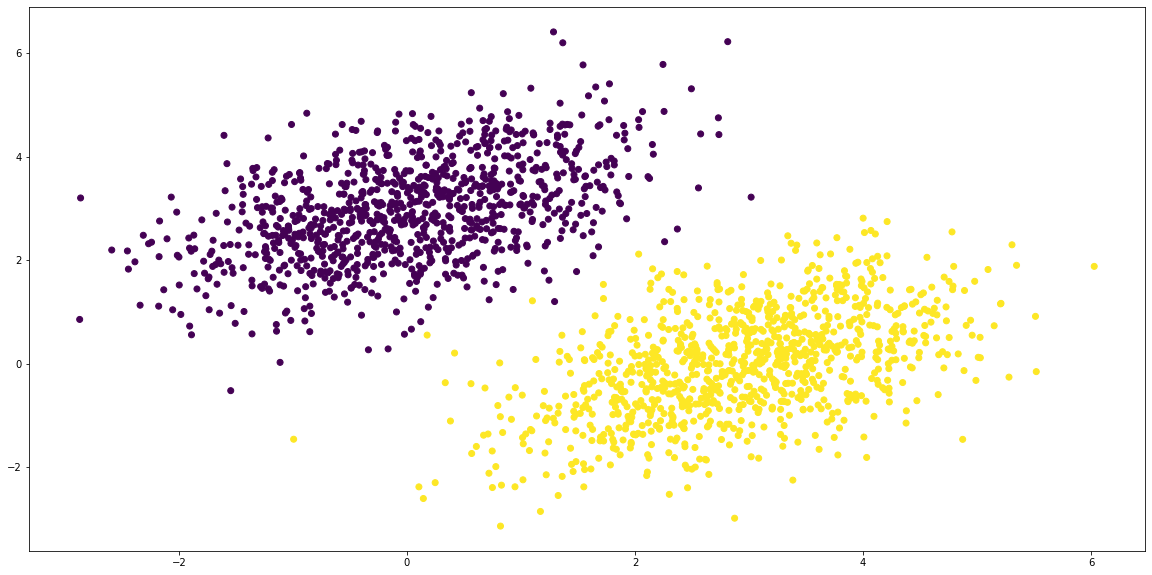

In [181]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [179]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.8493881 ],
       [0.08162391]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

In [183]:
def model(inputs):
    return tf.matmul(inputs, W) + b
model(inputs)

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.5728586 ],
       [ 0.5678466 ],
       [-0.15548131],
       ...,
       [ 2.818741  ],
       [ 1.8984144 ],
       [ 3.6627533 ]], dtype=float32)>

**The mean squared error loss function**

In [187]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [189]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss
training_step(inputs,targets)

<tf.Tensor: shape=(), dtype=float32, numpy=1.9231232>

**The batch training loop**

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9065
Loss at step 1: 0.0944
Loss at step 2: 0.0824
Loss at step 3: 0.0768
Loss at step 4: 0.0724
Loss at step 5: 0.0685
Loss at step 6: 0.0649
Loss at step 7: 0.0616
Loss at step 8: 0.0586
Loss at step 9: 0.0559
Loss at step 10: 0.0534
Loss at step 11: 0.0510
Loss at step 12: 0.0489
Loss at step 13: 0.0470
Loss at step 14: 0.0452
Loss at step 15: 0.0435
Loss at step 16: 0.0420
Loss at step 17: 0.0407
Loss at step 18: 0.0394
Loss at step 19: 0.0382
Loss at step 20: 0.0372
Loss at step 21: 0.0362
Loss at step 22: 0.0353
Loss at step 23: 0.0345
Loss at step 24: 0.0337
Loss at step 25: 0.0330
Loss at step 26: 0.0324
Loss at step 27: 0.0318
Loss at step 28: 0.0313
Loss at step 29: 0.0308
Loss at step 30: 0.0303
Loss at step 31: 0.0299
Loss at step 32: 0.0296
Loss at step 33: 0.0292
Loss at step 34: 0.0289
Loss at step 35: 0.0286
Loss at step 36: 0.0283
Loss at step 37: 0.0281
Loss at step 38: 0.0279
Loss at step 39: 0.0277


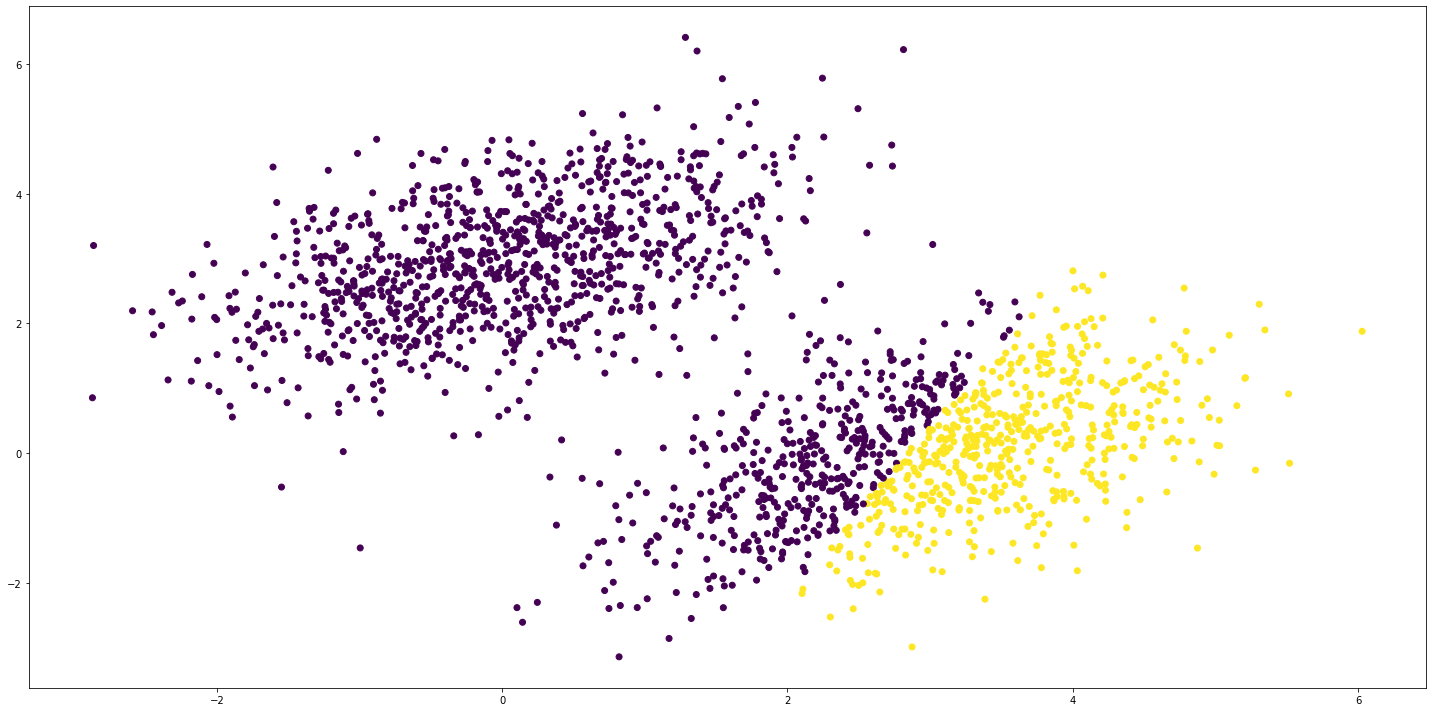

In [211]:
predictions = model(inputs)
plt.figure(figsize = (20,10))
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.tight_layout()

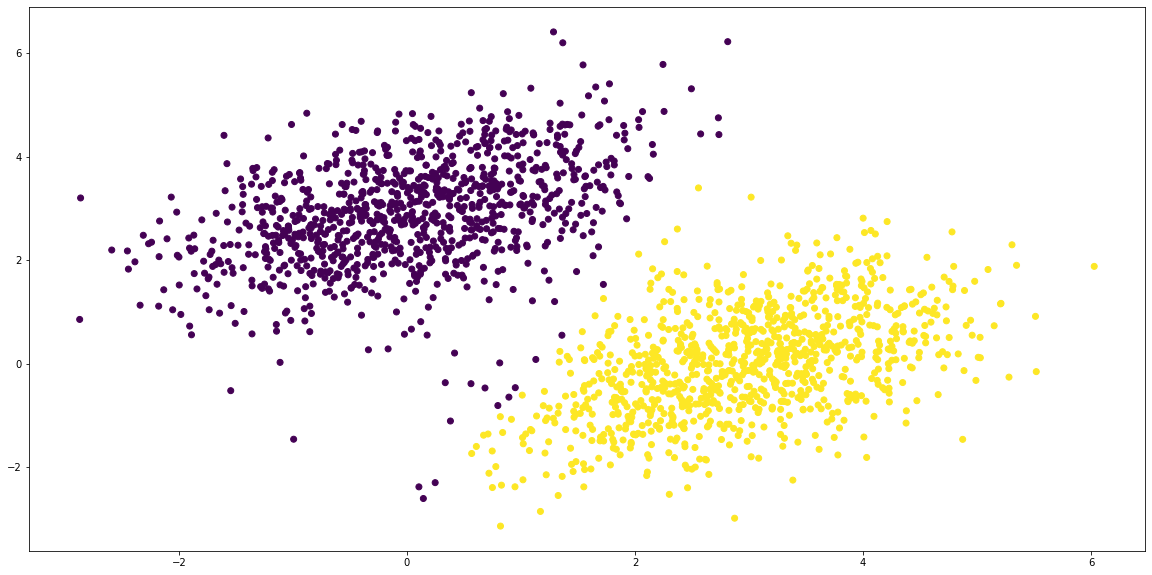

In [207]:
plt.figure(figsize = (20,10))
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.1)

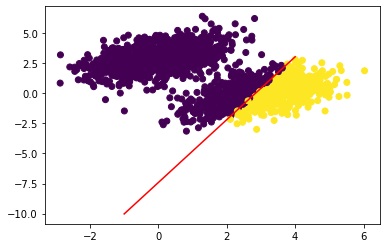

In [214]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [215]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [28]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [29]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [31]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [32]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [33]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [38]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 0.0709 - binary_accuracy: 0.9580
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 0.0705 - binary_accuracy: 0.9630
Epoch 3/5
16/16 [==============================] - 0s 911us/step - loss: 0.0721 - binary_accuracy: 0.9605
Epoch 4/5
16/16 [==============================] - 0s 868us/step - loss: 0.0708 - binary_accuracy: 0.9610
Epoch 5/5
16/16 [==============================] - 0s 910us/step - loss: 0.0771 - binary_accuracy: 0.9550


In [35]:
history.history

{'loss': [7.0068440437316895,
  6.694368839263916,
  6.432560443878174,
  6.180704116821289,
  5.9377312660217285],
 'binary_accuracy': [0.9764999747276306,
  0.9754999876022339,
  0.9750000238418579,
  0.9739999771118164,
  0.9739999771118164]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [36]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.2557 - binary_accuracy: 0.9714 - val_loss: 0.1465 - val_binary_accuracy: 0.9117
Epoch 2/5
88/88 [==============================] - 0s 950us/step - loss: 0.0771 - binary_accuracy: 0.9550 - val_loss: 0.0361 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 939us/step - loss: 0.0743 - binary_accuracy: 0.9629 - val_loss: 0.0559 - val_binary_accuracy: 0.9867
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0704 - binary_accuracy: 0.9586 - val_loss: 0.0480 - val_binary_accuracy: 0.9867
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0745 - binary_accuracy: 0.9500 - val_loss: 0.0378 - val_binary_accuracy: 1.0000


### Inference: Using a model after training

In [37]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.23043248]
 [0.17389494]
 [0.8640161 ]
 [0.890746  ]
 [0.11011195]
 [0.8452377 ]
 [0.21729127]
 [0.09741735]
 [0.8545766 ]
 [0.88842916]]


## Summary